In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv("Loan Prediction Dataset.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,Urban,Y


In [4]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount
count,913.000000,938.000000,938.000000,911.000000
mean,0.783133,5211.906183,1598.122516,143.162459
std,1.030808,5804.927551,2730.089846,78.318496
min,0.000000,0.000000,0.000000,9.000000
25%,0.000000,2875.250000,0.000000,100.000000
50%,0.000000,3793.000000,1094.500000,127.000000
75%,2.000000,5531.500000,2366.500000,162.000000
max,3.000000,81000.000000,41667.000000,700.000000


In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
df.isnull().sum()

Loan_ID              324
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         54
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Property_Area          0
Loan_Status            0
dtype: int64

In [8]:
df.shape

(938, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 938 entries, 0 to 937
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             914 non-null    object 
 2   Married            935 non-null    object 
 3   Dependents         913 non-null    float64
 4   Education          938 non-null    object 
 5   Self_Employed      884 non-null    object 
 6   ApplicantIncome    938 non-null    int64  
 7   CoapplicantIncome  938 non-null    float64
 8   LoanAmount         911 non-null    float64
 9   Property_Area      938 non-null    object 
 10  Loan_Status        938 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 80.7+ KB


In [10]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
933,NaN,Male,No,0.0,Graduate,No,3083,2738.0,120.0,Urban,N
934,NaN,Male,Yes,1.0,Graduate,No,2667,1542.0,148.0,Rural,Y
935,NaN,Female,Yes,0.0,Not Graduate,No,1647,1762.0,181.0,Urban,Y
936,NaN,Male,Yes,3.0,Graduate,No,3400,0.0,80.0,Urban,N


In [11]:
#fill the missing values for numerical terms - mean
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [12]:
#fill the missing values for categorical terms - mode
df['Gender'] = df["Gender"].fillna(df['Gender'].mode()[0])
df['Married'] = df["Married"].fillna(df['Married'].mode()[0])
df['Dependents'] = df["Dependents"].fillna(df['Dependents'].mode()[0])
df['Self_Employed'] = df["Self_Employed"].fillna(df['Self_Employed'].mode()[0])

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,143.162459,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.000000,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...
933,NaN,Male,No,0.0,Graduate,No,3083,2738.0,120.000000,Urban,N
934,NaN,Male,Yes,1.0,Graduate,No,2667,1542.0,148.000000,Rural,Y
935,NaN,Female,Yes,0.0,Not Graduate,No,1647,1762.0,181.000000,Urban,Y
936,NaN,Male,Yes,3.0,Graduate,No,3400,0.0,80.000000,Urban,N


In [14]:
df= df.drop(columns =['Loan_ID'],axis=1)

In [15]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Property_Area        0
Loan_Status          0
dtype: int64

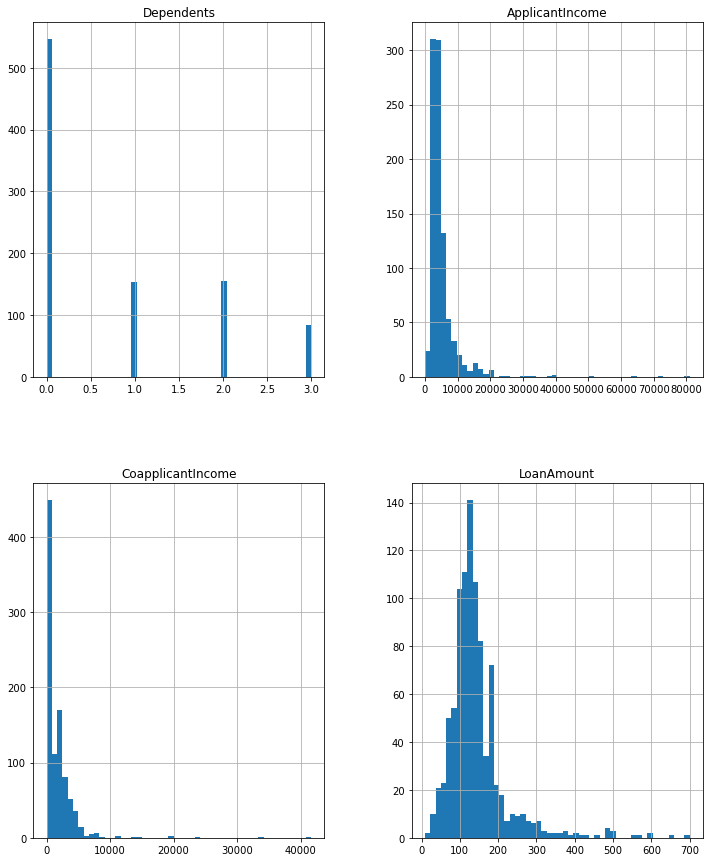

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12,15))
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Male      761
Female    177
Name: Gender, dtype: int64

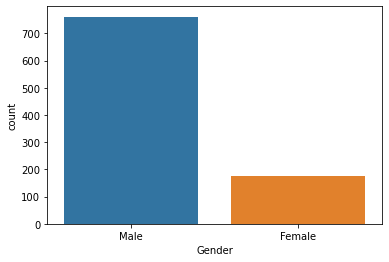

In [17]:
sns.countplot(df['Gender'])
df['Gender'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Yes    603
No     335
Name: Married, dtype: int64

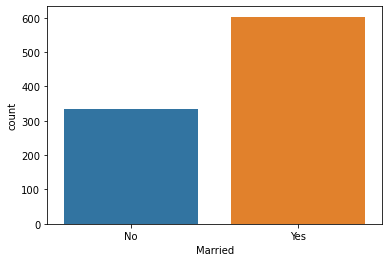

In [18]:
sns.countplot(df['Married'])
df['Married'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0.0    546
2.0    155
1.0    153
3.0     84
Name: Dependents, dtype: int64

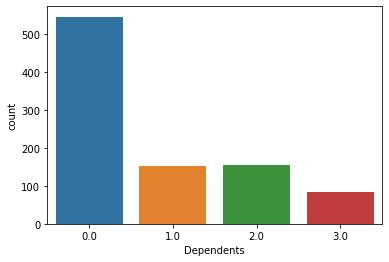

In [19]:
sns.countplot(df['Dependents'])
df['Dependents'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Graduate        729
Not Graduate    209
Name: Education, dtype: int64

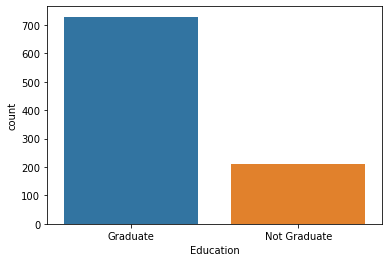

In [20]:
sns.countplot(df['Education'])
df['Education'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No     826
Yes    112
Name: Self_Employed, dtype: int64

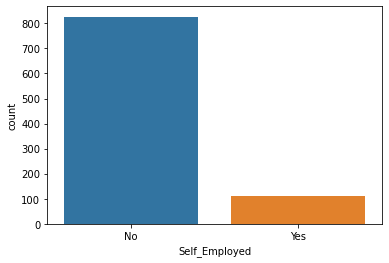

In [21]:
sns.countplot(df['Self_Employed'])
df['Self_Employed'].value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Y    607
N    331
Name: Loan_Status, dtype: int64

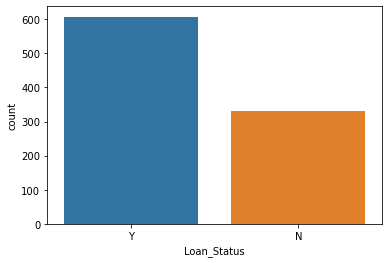

In [22]:
sns.countplot(df['Loan_Status'])
df['Loan_Status'].value_counts()

<AxesSubplot:xlabel='ApplicantIncome', ylabel='LoanAmount'>

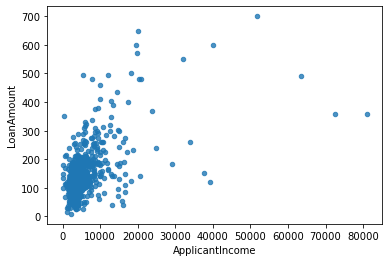

In [23]:
df.plot(kind="scatter", x="ApplicantIncome", y="LoanAmount", alpha=0.8)

In [24]:
#sns.barplot(x="Gender", y="Dependents", data=df)

In [25]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,143.162459,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,0,0
2,1,1,0,0,1,3000,0.0,66.000000,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,2,1
4,1,0,0,0,0,6000,0.0,141.000000,2,1
...,...,...,...,...,...,...,...,...,...,...
933,1,0,0,0,0,3083,2738.0,120.000000,2,0
934,1,1,1,0,0,2667,1542.0,148.000000,0,1
935,0,1,0,1,0,1647,1762.0,181.000000,2,1
936,1,1,3,0,0,3400,0.0,80.000000,2,0


<AxesSubplot:xlabel='Gender', ylabel='Married'>

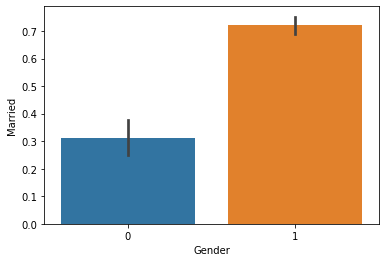

In [26]:
sns.barplot(x="Gender", y="Married", data=df)

In [27]:
# df.replace({'Gender': {'Female':0, 'Male':1 }, 
#           'Married': {'No':0, 'Yes':1},
#           'Education': {'Not Graduate':0, 'Graduate':1},
#           'Self_Employed': {'No':0, 'Yes':1},
#           'Loan_Status': {'N':0, 'Y':1},
#           'Dependents': {'3+':3}},inplace= True)
# df

In [28]:
#sns.catplot(data=df, x="Gender", y="Loan_Status", hue="Gender")

<AxesSubplot:>

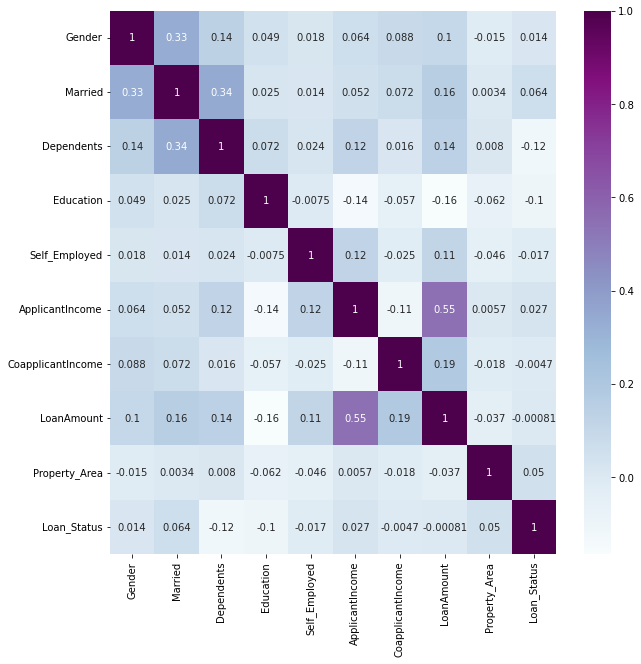

In [29]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot = True, cmap="BuPu")

## Stratified Sampling

In [30]:
#specify input and output attributes
X = df.drop(columns =['Loan_Status'],axis=1)
y = df['Loan_Status']

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [32]:
print(y_train.value_counts(normalize=True), '\n\n')

print(y_test.value_counts(normalize=True))

1    0.662667
0    0.337333
Name: Loan_Status, dtype: float64 


1    0.585106
0    0.414894
Name: Loan_Status, dtype: float64


In [33]:
#sns.pairplot(df)

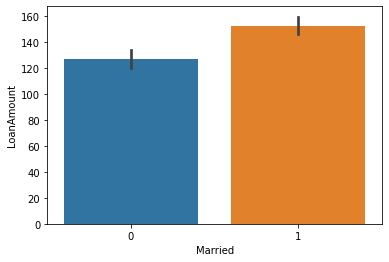

In [34]:
sns.barplot(x = 'Married',y = 'LoanAmount',data = df)
 
plt.show()

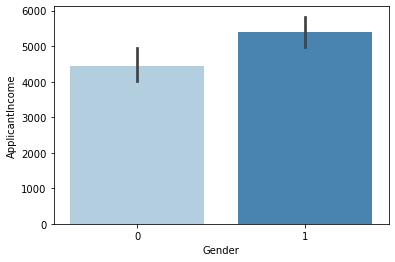

In [35]:
sns.barplot(x = 'Gender',
            y = 'ApplicantIncome',
            data = df,
            palette = "Blues")
 
plt.show()

<AxesSubplot:>

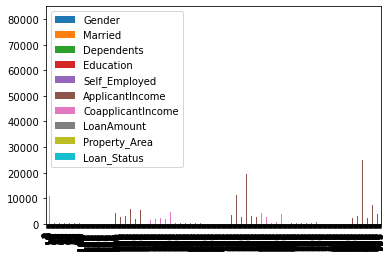

In [36]:
df.plot(kind = 'bar')

## Normalization

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
df2= scaler.fit_transform(df)


In [38]:
df2= pd.DataFrame(df, columns= ['Gender','Married','Dependents',
                               'Self_Employed','ApplicantIncome',
                               'CoapplicantIncome',
                               'Education','Property_Area',
                               'Loan_Status','LoanAmount' ])

In [39]:
#sns.pairplot(df2)

In [40]:
df2.describe()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Education,Property_Area,Loan_Status,LoanAmount
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.811301,0.642857,0.762260,0.119403,5211.906183,1598.122516,0.222814,1.054371,0.647122,143.162459
std,0.391478,0.479413,1.024765,0.324435,5804.927551,2730.089846,0.416357,0.797693,0.478120,77.181860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,2875.250000,0.000000,0.000000,0.000000,0.000000,102.000000
50%,1.000000,1.000000,0.000000,0.000000,3793.000000,1094.500000,0.000000,1.000000,1.000000,128.000000
75%,1.000000,1.000000,2.000000,0.000000,5531.500000,2366.500000,0.000000,2.000000,1.000000,160.750000
max,1.000000,1.000000,3.000000,1.000000,81000.000000,41667.000000,1.000000,2.000000,1.000000,700.000000


In [41]:
#df2.plot(kind="scatter", x="ApplicantIncome", y="LoanAmount", alpha=0.8)

In [42]:
df2

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Education,Property_Area,Loan_Status,LoanAmount
0,1,0,0,0,5849,0.0,0,2,1,143.162459
1,1,1,1,0,4583,1508.0,0,0,0,128.000000
2,1,1,0,1,3000,0.0,0,2,1,66.000000
3,1,1,0,0,2583,2358.0,1,2,1,120.000000
4,1,0,0,0,6000,0.0,0,2,1,141.000000
...,...,...,...,...,...,...,...,...,...,...
933,1,0,0,0,3083,2738.0,0,2,0,120.000000
934,1,1,1,0,2667,1542.0,0,0,1,148.000000
935,0,1,0,0,1647,1762.0,1,2,1,181.000000
936,1,1,3,0,3400,0.0,0,2,0,80.000000


## Standarization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
df3= scaler.fit_transform(df)


In [44]:
df3= pd.DataFrame(df, columns= ['Gender','Married','Dependents',
                               'Self_Employed','ApplicantIncome',
                               'CoapplicantIncome',
                               'Education','Property_Area',
                               'Loan_Status','LoanAmount' ])

In [45]:
#sns.pairplot(df3)

In [46]:
df3.describe()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Education,Property_Area,Loan_Status,LoanAmount
count,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000,938.000000
mean,0.811301,0.642857,0.762260,0.119403,5211.906183,1598.122516,0.222814,1.054371,0.647122,143.162459
std,0.391478,0.479413,1.024765,0.324435,5804.927551,2730.089846,0.416357,0.797693,0.478120,77.181860
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000
25%,1.000000,0.000000,0.000000,0.000000,2875.250000,0.000000,0.000000,0.000000,0.000000,102.000000
50%,1.000000,1.000000,0.000000,0.000000,3793.000000,1094.500000,0.000000,1.000000,1.000000,128.000000
75%,1.000000,1.000000,2.000000,0.000000,5531.500000,2366.500000,0.000000,2.000000,1.000000,160.750000
max,1.000000,1.000000,3.000000,1.000000,81000.000000,41667.000000,1.000000,2.000000,1.000000,700.000000


In [47]:
df3

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,Education,Property_Area,Loan_Status,LoanAmount
0,1,0,0,0,5849,0.0,0,2,1,143.162459
1,1,1,1,0,4583,1508.0,0,0,0,128.000000
2,1,1,0,1,3000,0.0,0,2,1,66.000000
3,1,1,0,0,2583,2358.0,1,2,1,120.000000
4,1,0,0,0,6000,0.0,0,2,1,141.000000
...,...,...,...,...,...,...,...,...,...,...
933,1,0,0,0,3083,2738.0,0,2,0,120.000000
934,1,1,1,0,2667,1542.0,0,0,1,148.000000
935,0,1,0,0,1647,1762.0,1,2,1,181.000000
936,1,1,3,0,3400,0.0,0,2,0,80.000000


## Training Logistic Model from Stratch

In [48]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred


In [49]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

def accuracy(y_pred, y_test):
    return np.sum(y_pred==y_test)/len(y_test)

acc = accuracy(y_pred, y_test)
print(acc)

C:\Users\Dell\AppData\Local\Temp\ipykernel_26880\404942246.py:2: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


0.5851063829787234


In [50]:
 #classify function
from sklearn.model_selection import cross_val_score
def classify(model, x ,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test,y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is,",np.mean(score)*100)

In [51]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 64.8936170212766
Cross validation is, 63.75753783138014


In [52]:
 #classify function
from sklearn.model_selection import cross_val_score
def classify(model, x ,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)
    model.fit(x_train,y_train)
    print("Accuracy is", model.score(x_test,y_test)*100)
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is,",np.mean(score)*100)

In [53]:
# from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

# model = RandomForestClassifier()
# model.fit(X_train,y_train)

# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_predict))

In [ ]:
from sklearn import svm

classifier= svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train, y_train)

y_predict= classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

In [ ]:
model = ExtraTreesClassifier()
classify(model, X, y)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

In [ ]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

In [ ]:
from sklearn.linear_model import LogisticRegression   #Import the relevant model
model = LogisticRegression()  #Create an instance of the model.

model.fit(X_train, y_train)  # Train the model using training data

#STEP 8: TESTING THE MODEL BY PREDICTING ON TEST DATA
#AND CALCULATE THE ACCURACY SCORE
prediction_test = model.predict(X_test)

from sklearn import metrics
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

In [ ]:


# def accuracy(y_pred, y_test):
#     return np.sum(y_pred==y_test)/len(y_test)

# acc = accuracy(y_pred, y_test)
# print(acc)

In [ ]:
clf = LogisticRegression()
clf.fit(X_train,y_train)
prediction = clf.predict(X_test)

In [ ]:
t = clf.predict([[ 0,      1,      2,          0,         1,            1165,            3222,          150,          1]])
#                Gender Married Dependents Education Self_Employed ApplicantIncome CoapplicantIncome Loan Amount Property_Area  

In [ ]:
print(t)